Mini Project #2: Will Waters

In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#Dataset
golfDF = pd.read_csv("golf_trajectory.csv")
golfDF.describe()

,Club Speed (mph),Attack Angle (deg),Club Path (deg),Club Face (deg),Face to Path (deg),Ball Speed (mph),Smash Factor,Launch Angle (deg),Launch Direction (deg),Backspin (rpm),...,Apex Height (ft),Total Distance (yards),Total Deviation Angle (deg),Total Deviation Distance (yards),Air Density (g/L),Temperature (F),Air Pressure (kPA),Carry Distance (yards),Carry Deviation Angle (deg),Carry Deviation Distance (yards)
count,758.000000,740.000000,743.000000,766.000000,742.000000,832.000000,832.000000,818.000000,832.000000,832.000000,...,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,81.397331,-2.119351,0.562638,0.333238,0.079447,103.858801,inf,15.707518,-0.016202,3512.176557,...,44.597064,158.093671,0.669339,2.217722,1.003808,69.815837,85.233822,131.874135,1.077788,2.664999
std,11.704183,3.756463,4.311373,7.003897,8.722264,19.109267,NaN,8.447926,8.132596,1902.703774,...,26.409231,44.586713,11.228183,26.184995,0.084423,0.470330,7.183699,47.151882,19.128085,21.650587
min,0.000000,-10.100000,-24.330000,-28.580000,-36.450000,0.022369,-59.450001,0.520000,-87.830002,79.088623,...,0.000000,0.000000,-84.750000,-64.818461,0.950878,69.692000,80.740000,0.000000,-147.100006,-61.570428
25%,76.889093,-4.532500,-1.805000,-3.860000,-4.665000,92.474947,1.141554,11.125000,-3.930000,2100.658874,...,24.729331,132.059273,-5.622500,-15.275044,0.950878,69.692000,80.740000,105.309491,-5.247500,-10.679134
50%,82.218593,-2.920000,0.600000,0.000000,0.085000,105.572212,1.274246,15.140000,-0.020000,3362.796387,...,43.848424,162.111768,0.260000,0.885827,0.950878,69.692000,80.740000,136.351706,0.355000,0.043745
75%,88.303060,-0.462500,3.005000,4.162500,4.175000,117.025325,1.362763,19.265001,3.617500,4662.792724,...,61.983266,185.886915,7.342500,19.690508,1.086393,69.692000,92.180000,164.919621,7.145000,16.415136
max,144.729778,14.500000,20.510000,29.750000,48.110000,141.665179,inf,76.139999,40.529999,15367.489260,...,122.867457,272.790904,48.119999,98.425197,1.190120,71.600000,101.330000,250.546813,173.380005,96.139549


In [3]:
#Columns Missing Data
def printAmtNa(aDF):
    for aCol in aDF:
        print(f"The Amount of missing values in {aCol} is {aDF[aCol].isna().sum()}")

printAmtNa(golfDF)

The Amount of missing values in Club Speed (mph) is 74
The Amount of missing values in Attack Angle (deg) is 92
The Amount of missing values in Club Path (deg) is 89
The Amount of missing values in Club Face (deg) is 66
The Amount of missing values in Face to Path (deg) is 90
The Amount of missing values in Ball Speed (mph) is 0
The Amount of missing values in Smash Factor is 0
The Amount of missing values in Launch Angle (deg) is 14
The Amount of missing values in Launch Direction (deg) is 0
The Amount of missing values in Backspin (rpm) is 0
The Amount of missing values in Sidespin (rpm) is 0
The Amount of missing values in Spin Rate (rpm) is 0
The Amount of missing values in Spin Rate Type is 0
The Amount of missing values in Spin Axis (deg) is 0
The Amount of missing values in Apex Height (ft) is 0
The Amount of missing values in Total Distance (yards) is 0
The Amount of missing values in Total Deviation Angle (deg) is 0
The Amount of missing values in Total Deviation Distance (yar

In [4]:
#Removed Rows with NA
remDF = golfDF.dropna(axis=0)
remDF.describe()

,Club Speed (mph),Attack Angle (deg),Club Path (deg),Club Face (deg),Face to Path (deg),Ball Speed (mph),Smash Factor,Launch Angle (deg),Launch Direction (deg),Backspin (rpm),...,Apex Height (ft),Total Distance (yards),Total Deviation Angle (deg),Total Deviation Distance (yards),Air Density (g/L),Temperature (F),Air Pressure (kPA),Carry Distance (yards),Carry Deviation Angle (deg),Carry Deviation Distance (yards)
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,...,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,81.941179,-2.100902,0.541207,0.344383,-0.196824,104.579533,inf,15.354341,0.350319,3585.875916,...,45.276683,160.681962,0.814244,2.534938,1.010247,69.832255,85.780763,134.388739,0.858447,2.991343
std,9.944627,3.786040,4.273571,6.925309,7.796119,16.438497,NaN,7.178425,5.762458,1928.570897,...,25.498402,40.078657,9.457746,25.534331,0.087304,0.498277,7.430224,41.797066,9.004693,21.062335
min,0.000000,-10.100000,-24.330000,-28.580000,-36.450000,28.968325,0.320386,0.520000,-22.490000,79.088623,...,0.032808,18.810150,-27.540001,-64.818461,0.950878,69.692000,80.740000,6.135171,-27.610001,-61.570428
25%,77.129563,-4.520000,-1.810000,-4.000000,-4.590000,92.944701,1.191411,11.270000,-3.250000,2168.872314,...,26.279528,134.492567,-5.240000,-14.588802,0.950878,69.692000,80.740000,109.416014,-4.940000,-10.564304
50%,82.453472,-2.920000,0.600000,0.190000,0.040000,105.068900,1.290053,14.940000,0.300000,3454.358398,...,44.324148,162.357838,0.520000,1.432633,0.950878,69.692000,80.740000,136.253277,0.520000,0.863955
75%,88.381353,-0.440000,2.990000,4.330000,4.030000,116.745702,1.369320,19.290001,3.720000,4743.455078,...,61.056432,187.357838,7.310000,19.685039,1.086393,69.692000,92.180000,163.221785,7.010000,16.404199
max,103.726736,14.500000,20.510000,29.750000,30.960000,141.665179,inf,59.349998,25.379999,15367.489260,...,122.867457,272.790904,30.690001,98.425197,1.190120,71.600000,101.330000,250.546813,29.370001,96.139549


In [5]:
#Checking for outliers
import seaborn as sns
def numBox(aDF, aCol):
    sns.boxplot(aDF[aCol])
    plt.title(f"Box Plot of {aCol}")
    plt.show()

columns = ['Club Speed (mph)', 'Attack Angle (deg)', 'Club Path (deg)', 'Club Face (deg)', 'Face to Path (deg)', 
           'Ball Speed (mph)', 'Smash Factor', 'Launch Angle (deg)', 'Launch Direction (deg)', 'Backspin (rpm)', 
           'Sidespin (rpm)', 'Spin Rate (rpm)', 'Spin Rate Type', 'Spin Axis (deg)', 'Apex Height (ft)', 
           'Total Distance (yards)', 'Total Deviation Angle (deg)', 'Total Deviation Distance (yards)', 'Air Density (g/L)', 
           'Temperature (F)', 'Air Pressure (kPA)', 'Carry Distance (yards)', 'Carry Deviation Angle (deg)', 
           'Carry Deviation Distance (yards)']

So given the data most of the deviations come from outliers in the club speed so if the club speed outliers are removed the rest of the data should be good.

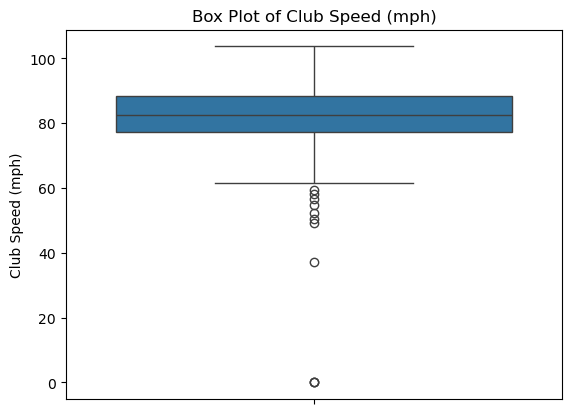

In [ ]:
#Box plot Club Speeds
numBox(remDF, columns[0])

In [13]:
#Dropping unnecessary Columns
remDF_unreset = remDF.drop(columns = ['Air Density (g/L)', 'Temperature (F)', 'Air Pressure (kPA)', 'Spin Rate Type', ])

#Then reset the index
remDF1 = remDF_unreset.reset_index(drop=True)

In [14]:
#Removing the Outliers in Club Speed because that affects all of the other categories

z = np.abs(stats.zscore(remDF1['Club Speed (mph)']))

# lets set a threshold

zThreshold = 2
 
outlierIndices = np.where(z > zThreshold)[0]
zOutlierDF = remDF1.drop(outlierIndices)
print("Original DataFrame Shape:", remDF1.shape)
print("DataFrame Shape after Removing Outliers:", zOutlierDF.shape)

zOutlierDF.tail()


Original DataFrame Shape: (721, 20)
DataFrame Shape after Removing Outliers: (707, 20)


,Club Speed (mph),Attack Angle (deg),Club Path (deg),Club Face (deg),Face to Path (deg),Ball Speed (mph),Smash Factor,Launch Angle (deg),Launch Direction (deg),Backspin (rpm),Sidespin (rpm),Spin Rate (rpm),Spin Axis (deg),Apex Height (ft),Total Distance (yards),Total Deviation Angle (deg),Total Deviation Distance (yards),Carry Distance (yards),Carry Deviation Angle (deg),Carry Deviation Distance (yards)
716,89.947208,-3.13,-1.06,-14.96,-13.90,119.385288,1.327282,3.06,-12.42,2388.252441,388.095856,2419.580078,-9.230000,5.839895,182.556860,-14.63,-46.106736,101.684168,-13.97,-24.551619
717,83.952219,-3.74,-3.56,-1.94,1.62,101.937186,1.214229,8.86,-2.03,876.585144,1465.247314,1707.439941,-59.110001,10.301838,151.028003,-10.09,-26.465443,79.713473,-7.48,-10.378390
718,92.765748,-1.22,-1.00,-6.42,-5.42,115.336438,1.243308,8.76,-5.40,866.371277,1706.972168,1914.250000,-63.090000,12.992126,176.881021,-15.55,-47.419073,97.922136,-12.36,-20.964567
719,88.627416,-3.98,0.44,-5.06,-5.50,129.943629,1.466179,5.35,-4.10,1670.814941,956.497559,1925.229980,-29.790001,12.106299,211.756348,-10.70,-39.315399,128.423010,-8.81,-19.663167
720,94.107910,-2.44,3.46,-3.74,-7.20,128.489618,1.365343,9.67,-2.64,1692.044189,855.454407,1896.000000,-26.820000,31.135170,222.090991,-9.81,-37.849957,168.066484,-8.39,-24.518810


Now I can get into the necessary data vizualizations for our company

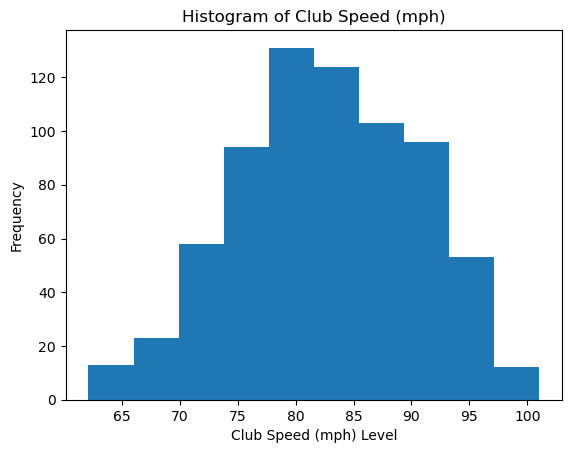

In [16]:
#Histogram Showing the different clubhead speeds (Important for the rest of the data)
def numericalCatHist(aDF, aCol):
    plt.hist(aDF[aCol])
    plt.xlabel(f"{aCol} Level")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {aCol}")
    plt.show()

numericalCatHist(zOutlierDF, 'Club Speed (mph)')

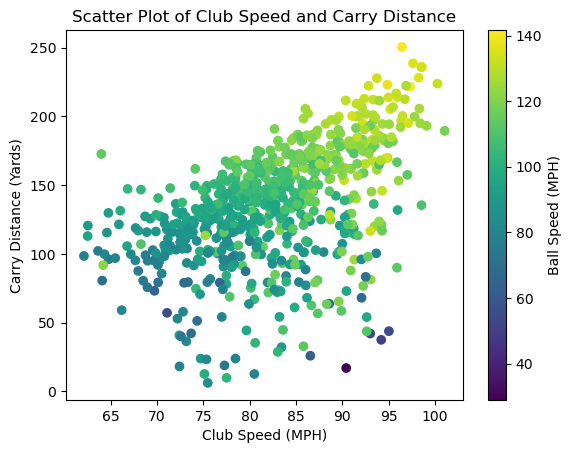

In [54]:
#Same as above but using smash factor to heatmap the graph
plt.scatter(zOutlierDF['Club Speed (mph)'], zOutlierDF['Carry Distance (yards)'], c=zOutlierDF['Ball Speed (mph)'],
            cmap='viridis')
plt.colorbar(label = "Ball Speed (MPH)")
plt.xlabel("Club Speed (MPH)")
plt.ylabel("Carry Distance (Yards)")
plt.title("Scatter Plot of Club Speed and Carry Distance")
plt.show()


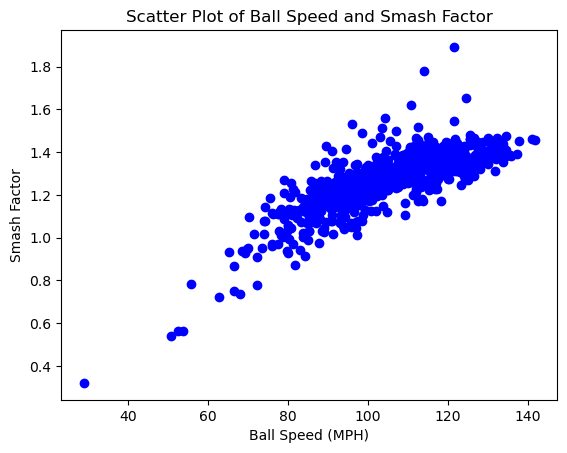

In [60]:
#Now we see Ball Speed is important to carry distance but why (Smash Factor)
#Scatterplot of ball speed and smash factor
plt.scatter(zOutlierDF['Ball Speed (mph)'], zOutlierDF['Smash Factor'], c="blue")
plt.xlabel("Ball Speed (MPH)")
plt.ylabel("Smash Factor")
plt.title("Scatter Plot of Ball Speed and Smash Factor")
plt.show()

In [43]:
#Big Question is how do we optimize smash factor because that is the biggest indicator of ball speed 
# (which was shown to optimize carry distance)
#Using a correlation matrix to try and find potential smash factor indicators
zOutlierDF.corr()


,Club Speed (mph),Attack Angle (deg),Club Path (deg),Club Face (deg),Face to Path (deg),Ball Speed (mph),Smash Factor,Launch Angle (deg),Launch Direction (deg),Backspin (rpm),Sidespin (rpm),Spin Rate (rpm),Spin Axis (deg),Apex Height (ft),Total Distance (yards),Total Deviation Angle (deg),Total Deviation Distance (yards),Carry Distance (yards),Carry Deviation Angle (deg),Carry Deviation Distance (yards)
Club Speed (mph),1.000000,0.037200,0.140790,-0.062175,-0.131492,0.662176,0.081872,-0.246785,-0.048254,-0.110327,-0.040987,-0.111314,-0.022608,0.144570,0.579455,0.011935,0.072601,0.485079,0.017159,0.110431
Attack Angle (deg),0.037200,1.000000,0.272173,0.104935,-0.056644,0.169229,0.217840,0.127960,0.129295,-0.309075,0.160314,-0.304308,-0.153160,0.117199,0.248407,-0.001748,0.030959,0.157149,0.010655,0.054096
Club Path (deg),0.140790,0.272173,1.000000,0.071556,-0.483646,0.053527,-0.039063,0.037561,0.164548,-0.053574,0.169847,-0.044837,-0.167803,0.033133,0.046192,-0.005114,0.013937,-0.002596,0.011350,0.043606
Club Face (deg),-0.062175,0.104935,0.071556,1.000000,0.838412,0.030650,0.071791,0.028790,0.995615,-0.026157,-0.409725,-0.007687,0.316747,0.120296,0.048892,0.842992,0.762539,0.150609,0.868986,0.754315
Face to Path (deg),-0.131492,-0.056644,-0.483646,0.838412,1.000000,-0.002353,0.084343,0.004739,0.783749,0.006322,-0.452350,0.017755,0.369644,0.087456,0.017662,0.742531,0.661522,0.133579,0.756344,0.638093
Ball Speed (mph),0.662176,0.169229,0.053527,0.030650,-0.002353,1.000000,0.796649,-0.468313,0.035337,-0.251951,0.026959,-0.263922,-0.082669,0.155251,0.915456,0.028917,0.038693,0.750836,0.041610,0.083867
Smash Factor,0.081872,0.217840,-0.039063,0.071791,0.084343,0.796649,1.000000,-0.415273,0.067317,-0.247603,0.085424,-0.262787,-0.106671,0.092141,0.751314,0.009208,-0.020009,0.603139,0.021715,0.010117
Launch Angle (deg),-0.246785,0.127960,0.037561,0.028790,0.004739,-0.468313,-0.415273,1.000000,0.032006,0.345581,0.049624,0.323891,-0.004092,0.696746,-0.275130,0.031787,0.102883,0.075214,0.019312,0.051597
Launch Direction (deg),-0.048254,0.129295,0.164548,0.995615,0.783749,0.035337,0.067317,0.032006,1.000000,-0.030928,-0.389243,-0.011841,0.297483,0.122065,0.052699,0.833156,0.755383,0.148707,0.860407,0.750038
Backspin (rpm),-0.110327,-0.309075,-0.053574,-0.026157,0.006322,-0.251951,-0.247603,0.345581,-0.030928,1.000000,-0.197248,0.985383,0.207105,0.453433,-0.309965,0.116431,0.136200,0.045189,0.096938,0.097413


It seems as if spin rate and launch angle have a lot to do with smash factor so this is what I will go in on

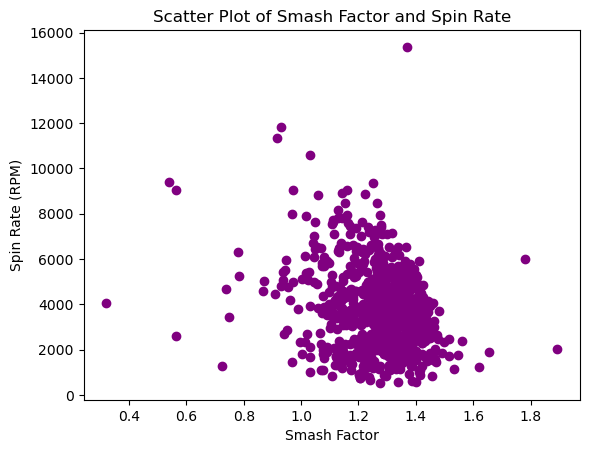

In [47]:
#Scatterplot of smash factor and spin rate
plt.scatter(zOutlierDF['Smash Factor'], zOutlierDF['Spin Rate (rpm)'], c="purple")
plt.xlabel("Smash Factor")
plt.ylabel("Spin Rate (RPM)")
plt.title("Scatter Plot of Smash Factor and Spin Rate")
plt.show()

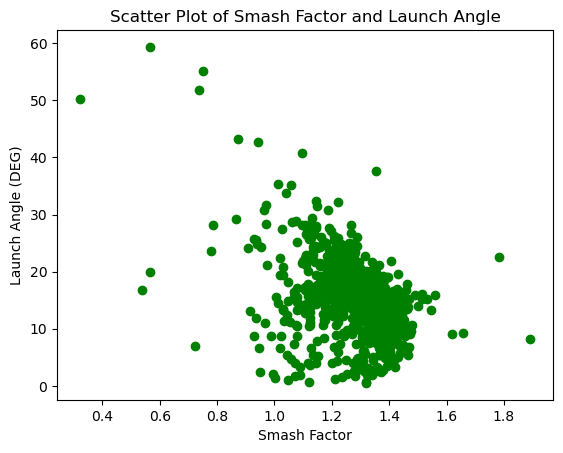

In [62]:
#Scatter for smash factor and launch angle
plt.scatter(zOutlierDF['Smash Factor'], zOutlierDF['Launch Angle (deg)'], c="green")
plt.xlabel("Smash Factor")
plt.ylabel("Launch Angle (DEG)")
plt.title("Scatter Plot of Smash Factor and Launch Angle")
plt.show()

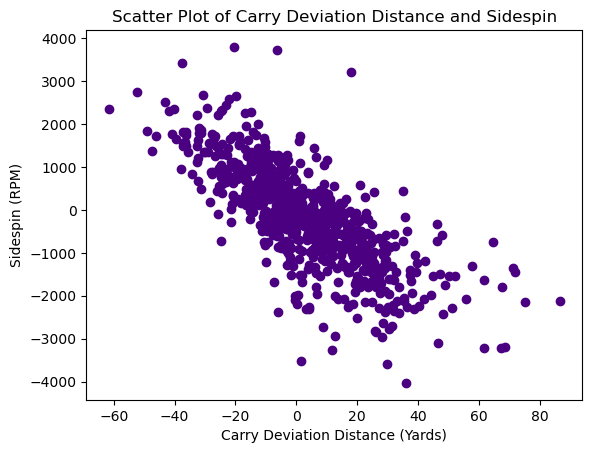

In [68]:
#Scatter carry distance deviation and sidespin
plt.scatter(zOutlierDF['Carry Deviation Distance (yards)'], zOutlierDF['Sidespin (rpm)'], c="indigo")
plt.xlabel("Carry Deviation Distance (Yards)")
plt.ylabel("Sidespin (RPM)")
plt.title("Scatter Plot of Carry Deviation Distance and Sidespin")
plt.show()

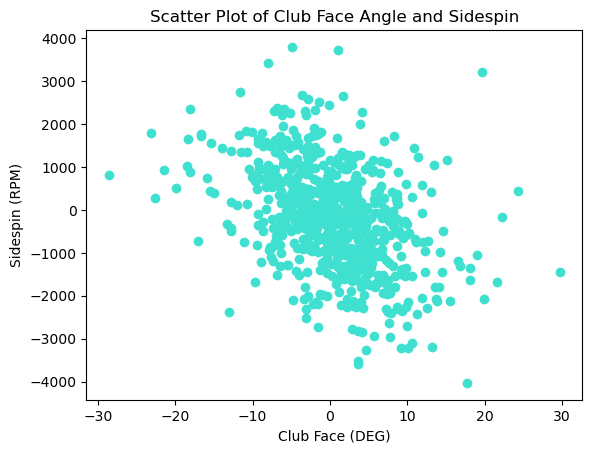

In [67]:
plt.scatter(zOutlierDF['Club Face (deg)'], zOutlierDF['Sidespin (rpm)'], c="turquoise")
plt.xlabel("Club Face (DEG)")
plt.ylabel("Sidespin (RPM)")
plt.title("Scatter Plot of Club Face Angle and Sidespin")
plt.show()